In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = "Karla"
plt.rcParams['font.family'] = "sans-serif"

In [6]:
def to_float(val):
   return float(val.replace("%", ""))/100

In [26]:
sleep = pd.read_csv("sleepdata.csv", sep = ";")
sleep = sleep.drop(columns=["Mood", "Heart rate (bpm)", "City", "Did snore", "Snore time", 
                            "Weather temperature (°F)", "Weather type", "Notes", "Window start", "Window stop"])
sleep['Start'] = pd.to_datetime(sleep['Start'])
sleep['End'] = pd.to_datetime(sleep['End'])
sleep = sleep.rename(columns={"Start": "tracking_start", "End": "tracking_end", 
                             "Sleep Quality": "quality", "Regularity": "regularity",
                             "Steps": "day_steps", "Alarm mode": "alarm", "Air Pressure (Pa)": "air_pressure",
                             "Movements per hour": "movements_per_hr", "Time in bed (seconds)": "time_total",
                             "Time asleep (seconds)": "time_asleep", "Time before sleep (seconds)": "time_presleep"})

sleep["quality"] = sleep["quality"].apply(to_float)
sleep["regularity"] = sleep["regularity"].apply(to_float)

In [27]:
sleep.to_csv("sleep_cleaned.csv")

In [74]:
sleep = pd.read_csv("sleep_cleaned.csv")

In [75]:
sleep['tracking_start'] = pd.to_datetime(sleep['tracking_start'])
sleep['tracking_end'] = pd.to_datetime(sleep['tracking_end'])

sleep['bed_hour'] = sleep['tracking_start'].dt.hour
sleep['wake_hour'] = sleep['tracking_end'].dt.hour

In [76]:
sleep_bedvswake = sleep[['quality', 'bed_hour', 'wake_hour']]

sleep_bedvswake = sleep_bedvswake.groupby(by = ['bed_hour', 'wake_hour'], as_index=False).count()

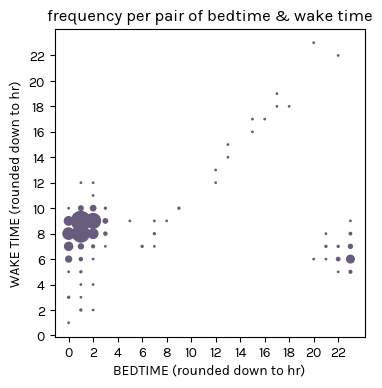

In [176]:
plt.figure(figsize=(4, 4))
plt.scatter(sleep_bedvswake['bed_hour'], sleep_bedvswake['wake_hour'], s = sleep_bedvswake['quality'], color = "#685c7d")

plt.title('frequency per pair of bedtime & wake time')
plt.xlabel('BEDTIME (rounded down to hr)')
plt.ylabel('WAKE TIME (rounded down to hr)')

plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(0, 24, 2))

#plt.show()

plt.savefig('bedtimevswaketime.png', dpi = 300, bbox_inches='tight')

In [87]:
sleep_hoursvsquality = sleep[['quality', 'bed_hour', 'wake_hour']]

sleep_hoursvsquality = sleep_hoursvsquality.groupby(by = ['bed_hour', 'wake_hour'], as_index=False)['quality'].mean()

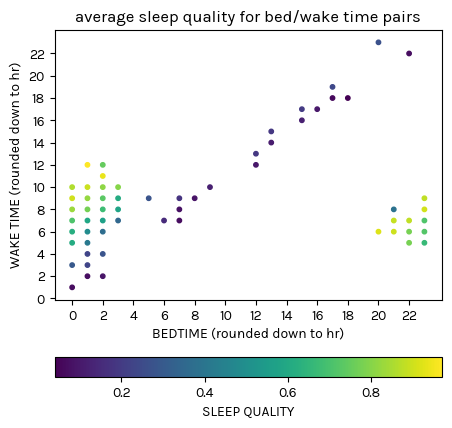

In [177]:
plt.figure(figsize=(5, 5))
plt.scatter(sleep_hoursvsquality['bed_hour'], sleep_hoursvsquality['wake_hour'], s = 10, c = sleep_hoursvsquality['quality'])

cbar = plt.colorbar(orientation = 'horizontal', extend = 'neither')
cbar.set_label(label = 'SLEEP QUALITY')

plt.title('average sleep quality for bed/wake time pairs')
plt.xlabel('BEDTIME (rounded down to hr)')
plt.ylabel('WAKE TIME (rounded down to hr)')

plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(0, 24, 2))

#plt.show()

plt.savefig('hoursvsquality.png', dpi = 300, bbox_inches='tight')

In [79]:
sleep_bedvsquality = sleep[['quality', 'bed_hour']]

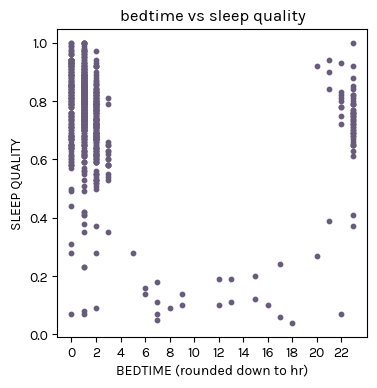

In [178]:
plt.figure(figsize=(4, 4))
plt.scatter(sleep_bedvsquality['bed_hour'], sleep_bedvsquality['quality'], s = 10, color = "#685c7d")

plt.title('bedtime vs sleep quality')
plt.xlabel('BEDTIME (rounded down to hr)')
plt.ylabel('SLEEP QUALITY')

plt.xticks(np.arange(0, 24, 2))

#plt.show()

plt.savefig('bedtimevsquality.png', dpi = 300, bbox_inches='tight')

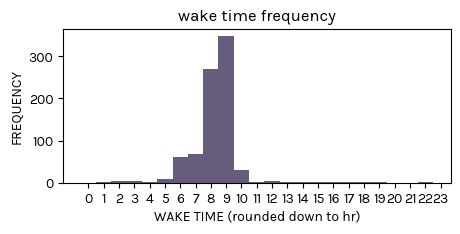

In [179]:
plt.figure(figsize=(5, 2))

x = sleep_histo['wake_hour']

plt.hist(x, bins = np.arange(24)-0.5, align = 'mid', color = "#685c7d")

plt.title('wake time frequency')
plt.xlabel('WAKE TIME (rounded down to hr)')
plt.ylabel('FREQUENCY')

plt.xticks(np.arange(0, 24, 1))

#plt.show
plt.savefig('waketimefreq.png', dpi = 300, bbox_inches='tight')

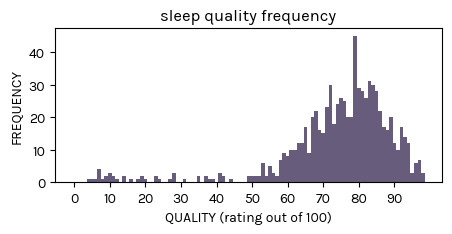

In [180]:
plt.figure(figsize=(5, 2))

x = sleep_histo['quality'] * 100

plt.hist(x, bins = np.arange(100) - 0.5, align = 'mid', color = "#685c7d")

plt.title('sleep quality frequency')
plt.xlabel('QUALITY (rating out of 100)')
plt.ylabel('FREQUENCY')

plt.xticks(np.arange(0, 100, 10))

#plt.show
plt.savefig('qualityfreq.png', dpi = 300, bbox_inches='tight')

In [156]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [171]:
sleep_histo['quality'] * 100

0       81.0
1      100.0
2       72.0
3       75.0
4       69.0
5       65.0
6       79.0
7       75.0
8       84.0
9       76.0
10      86.0
11      80.0
12      81.0
13      85.0
14      77.0
15      82.0
16      84.0
17      80.0
18      86.0
19      86.0
20      79.0
21      78.0
22      84.0
23      74.0
24      68.0
25      79.0
26      76.0
27      83.0
28      27.0
29      50.0
30      64.0
31      97.0
32      83.0
33      84.0
34      87.0
35      92.0
36      82.0
37       8.0
38      75.0
39      91.0
40      90.0
41      65.0
42      78.0
43      87.0
44      82.0
45      89.0
46      78.0
47      77.0
48      80.0
49      71.0
50      91.0
51      97.0
52      80.0
53      93.0
54      98.0
55      91.0
56      89.0
57      87.0
58      64.0
59      81.0
60      97.0
61      96.0
62      84.0
63      82.0
64      87.0
65      80.0
66      84.0
67      86.0
68      91.0
69      77.0
70      76.0
71      92.0
72      80.0
73      80.0
74      83.0
75      80.0
76      73.0